<a href="https://colab.research.google.com/github/ardalanebrahimi/EDU/blob/master/machin_vision_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if sys.path[0] == '':


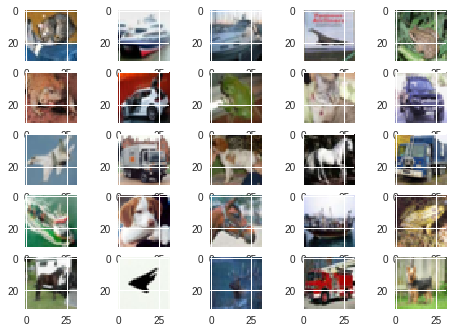

In [18]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
from matplotlib import pyplot
from scipy.misc import toimage
from keras.datasets import cifar10
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            pyplot.subplot2grid((5,5),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_imgs(x_test[:25])

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [24]:
import os
base_dir = '/content/drive/My Drive/cifar'

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

train_cat_dir = os.path.join(train_dir,'cat')
train_dog_dir = os.path.join(train_dir,'dog')
train_airplane_dir = os.path.join(train_dir,'airplane')
train_automobile_dir = os.path.join(train_dir,'automobile')
train_bird_dir = os.path.join(train_dir,'bird')
train_deer_dir = os.path.join(train_dir,'deer')
train_frog_dir = os.path.join(train_dir,'frog')
train_horse_dir = os.path.join(train_dir,'horse')
train_ship_dir = os.path.join(train_dir,'ship')
train_truck_dir = os.path.join(train_dir,'truck')


validation_cat_dir = os.path.join(validation_dir,'cat')
validation_dog_dir = os.path.join(validation_dir,'dog')
validation_airplane_dir = os.path.join(validation_dir,'airplane')
validation_automobile_dir = os.path.join(validation_dir,'automobile')
validation_bird_dir = os.path.join(validation_dir,'bird')
validation_deer_dir = os.path.join(validation_dir,'deer')
validation_frog_dir = os.path.join(validation_dir,'frog')
validation_horse_dir = os.path.join(validation_dir,'horse')
validation_ship_dir = os.path.join(validation_dir,'ship')
validation_truck_dir = os.path.join(validation_dir,'truck')

test_cat_dir = os.path.join(test_dir,'cat')
test_dog_dir = os.path.join(test_dir,'dog')
test_airplane_dir = os.path.join(test_dir,'airplane')
test_automobile_dir = os.path.join(test_dir,'automobile')
test_bird_dir = os.path.join(test_dir,'bird')
test_deer_dir = os.path.join(test_dir,'deer')
test_frog_dir = os.path.join(test_dir,'frog')
test_horse_dir = os.path.join(test_dir,'horse')
test_ship_dir = os.path.join(test_dir,'ship')
test_truck_dir = os.path.join(test_dir,'truck')


'/content/drive/My Drive/cifar/validation/truck'

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer= 'rmsprop',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [39]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode = 'categorical')
    
  
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode = 'categorical')

Found 2502 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [40]:
for data_batch, labels_batch in train_generator:
  print(data_batch.shape)
  print(labels_batch.shape)
  break

(20, 150, 150, 3)
(20, 10)


In [42]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cifar10_small.h5')

Epoch 1/30
 67/100 [===================>..........] - ETA: 3:14 - loss: 2.4578 - acc: 0.1194

FileNotFoundError: ignored